# Heart Disease Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


# EDA

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


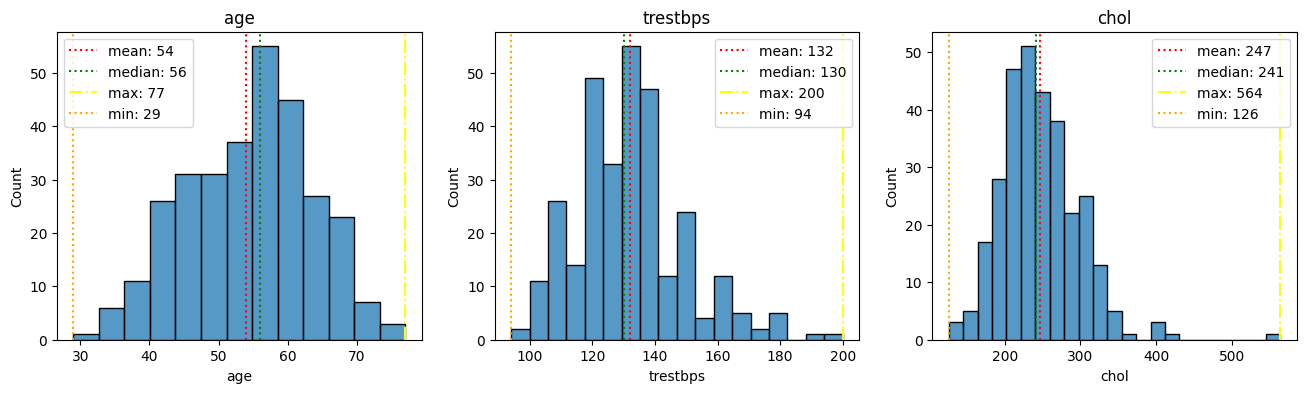

In [5]:
plt.figure(figsize=(16,4))
i = 131
col_to_plot = ['age', 'trestbps', 'chol']
for col in (col_to_plot):
    plt.subplot(i)
    data = df[col]
    plt.title(f'{col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


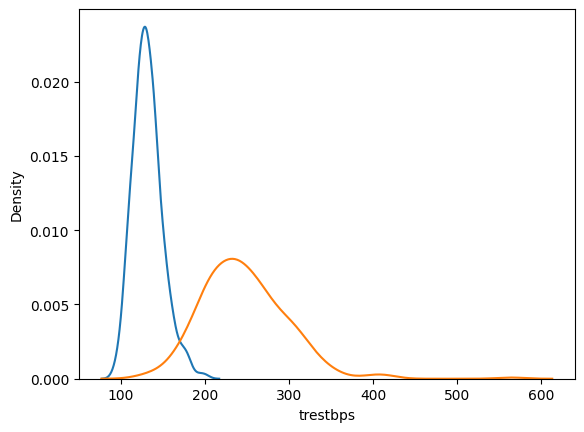

In [6]:
sns.kdeplot(df['trestbps'])
sns.kdeplot(df['chol'])
plt.show()

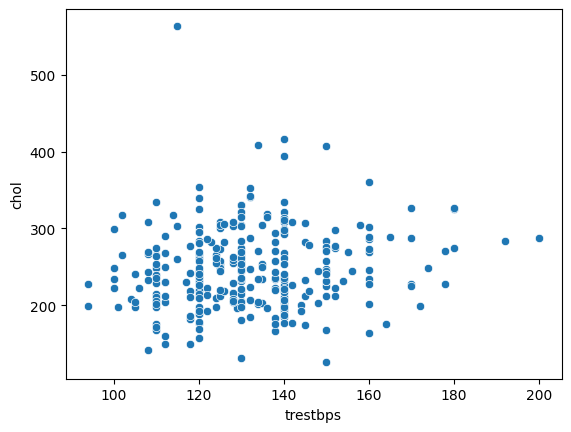

In [7]:
sns.scatterplot(x='trestbps', y='chol', data=df)
plt.show()

In [8]:
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

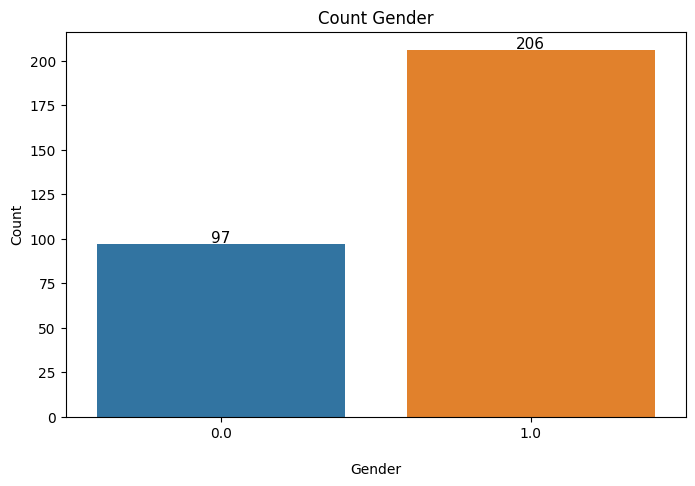

In [9]:
df_plot = df.copy(deep=True)
a = []
b = df_plot.columns.tolist()
for i in df_plot['sex'].value_counts().index.tolist():
    a.extend(df_plot[df_plot['sex']==i].values)

df_con = pd.DataFrame(columns=b, data=a)

plt.figure(figsize=(8,5))
ax = sns.countplot(x='sex', data=df_con)
plt.title('Count Gender')
plt.xlabel('\nGender')
plt.ylabel('Count')
# plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), ha="center", fontsize=11)

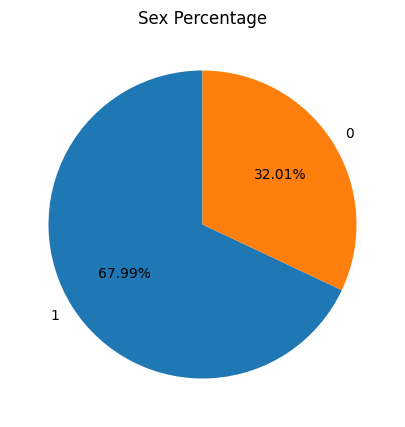

In [10]:
fig = plt.figure(figsize=(10,5))
# fig.patch.set_facecolor('xkcd:white')
plt.title('Sex Percentage')
sizes = df['sex'].value_counts().values.tolist()
labels = df['sex'].value_counts().index.tolist()

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.show()

<Axes: >

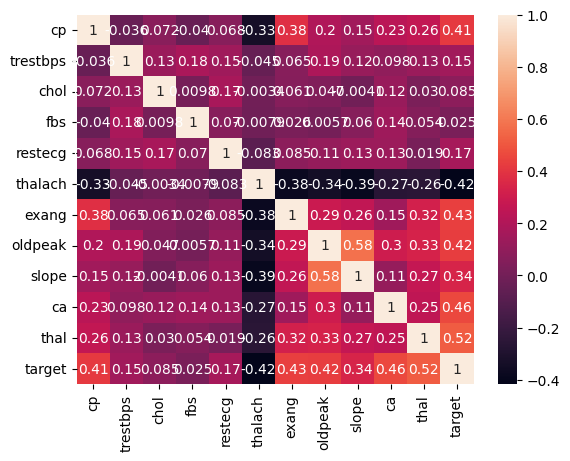

In [11]:
sns.heatmap(df.drop(['age','sex'],axis=1).corr(), annot=True)

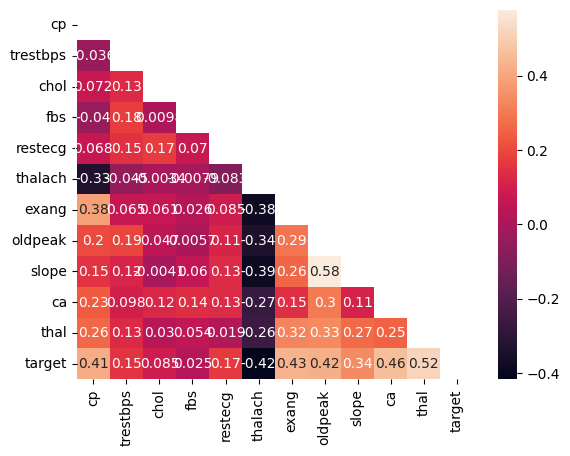

In [12]:
data = df.drop(['age','sex'],axis=1)
ut = np.triu(data.corr())
# lt = np.tril(data.corr())
sns.heatmap(data.corr(), annot=True, cbar='True', mask=ut)
plt.show()

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
df2 = df.copy(deep=True)
df2['trestbps'] = MinMaxScaler().fit_transform(df2[['trestbps']])
df2['chol'] = MinMaxScaler().fit_transform(df2[['chol']])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,0.481132,0.244292,1,2,150,0,2.3,2,0,2,0
1,67,1,3,0.622642,0.365297,0,2,108,1,1.5,1,3,1,1
2,67,1,3,0.245283,0.235160,0,2,129,1,2.6,1,2,3,1
3,37,1,2,0.339623,0.283105,0,0,187,0,3.5,2,0,1,0
4,41,0,1,0.339623,0.178082,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0.150943,0.315068,0,0,132,0,1.2,1,0,3,1
299,68,1,3,0.471698,0.152968,1,0,141,0,3.4,1,2,3,1
300,57,1,3,0.339623,0.011416,0,0,115,1,1.2,1,1,3,1
301,57,0,1,0.339623,0.251142,0,2,174,0,0.0,1,1,1,1


In [16]:
print(df2['trestbps'].min())
print(df2['trestbps'].max())
print(df2['chol'].min())
print(df2['chol'].max())

0.0
1.0
0.0
0.9999999999999998


# Partioning Clustering (K-Means)

In [17]:
from sklearn.cluster import KMeans

## Elbow Method

In [18]:
k = range(1,16)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i) # jumlah cluster akan di looping
    km_model.fit(df2[['trestbps','chol']])
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[12.545638574825098, 7.362305087590766, 5.444434354704671, 3.9836769698303933, 3.3700630285682704, 2.893542330121602, 2.527622077760433, 2.163632313252922, 1.9213137261029045, 1.757250440241882, 1.5676946756997805, 1.4084501807792842, 1.300212295520014, 1.1693078553479859, 1.0340430195596044]


C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


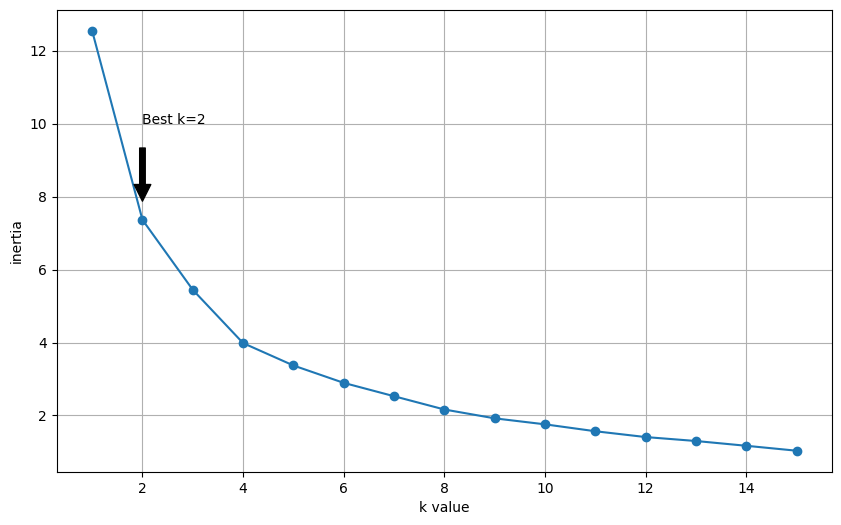

In [29]:
plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.annotate(
    'Best k=2', xy = (k[1], inertia[1]),
    xytext = (2, 10), arrowprops = dict(facecolor='black', shrink=0.2)
)
plt.grid()
plt.show()

## Clustering

In [30]:
kn5 = KMeans(n_clusters=2, random_state=1)
kn5

KMeans(n_clusters=2, random_state=1)

In [31]:
kn5.fit(df2[['trestbps','chol']])

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1)

In [32]:
kn5.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [33]:
df['Cluster_KM'] = kn5.predict(df2[['trestbps','chol']])
df2['Cluster_KM'] = kn5.predict(df2[['trestbps','chol']])
display(df)
display(df2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM
0,63,1,0,0.481132,0.244292,1,2,150,0,2.3,2,0,2,0,0
1,67,1,3,0.622642,0.365297,0,2,108,1,1.5,1,3,1,1,0
2,67,1,3,0.245283,0.235160,0,2,129,1,2.6,1,2,3,1,1
3,37,1,2,0.339623,0.283105,0,0,187,0,3.5,2,0,1,0,1
4,41,0,1,0.339623,0.178082,0,2,172,0,1.4,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0.150943,0.315068,0,0,132,0,1.2,1,0,3,1,1
299,68,1,3,0.471698,0.152968,1,0,141,0,3.4,1,2,3,1,0
300,57,1,3,0.339623,0.011416,0,0,115,1,1.2,1,1,3,1,1
301,57,0,1,0.339623,0.251142,0,2,174,0,0.0,1,1,1,1,1


In [34]:
from sklearn import metrics
labels = kn5.labels_
metrics.silhouette_score(df2[['trestbps','chol']], labels, metric='euclidean')

0.3818196113710217

In [35]:
df2[['trestbps','chol']].head()

,trestbps,chol
0,0.481132,0.244292
1,0.622642,0.365297
2,0.245283,0.235160
3,0.339623,0.283105
4,0.339623,0.178082


In [53]:
kn5_b = KMeans(n_clusters=2, random_state=1)
kn5_b.fit(df2[['trestbps','chol']])
kn5_b.labels_

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [54]:
from sklearn import metrics
labels = kn5_b.labels_
metrics.silhouette_score(df2[['trestbps','chol']], labels, metric='euclidean')

0.3818196113710217

In [ ]:
# 0.5594854531227246 # artinya kmeans lebih bagus jika memetakan dengan nilai scaled

## Visualization

C:\Users\Asus\AppData\Local\Temp\ipykernel_13944\2362763639.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x='trestbps', y='chol', hue='Cluster_KM', data=df, palette=palette)


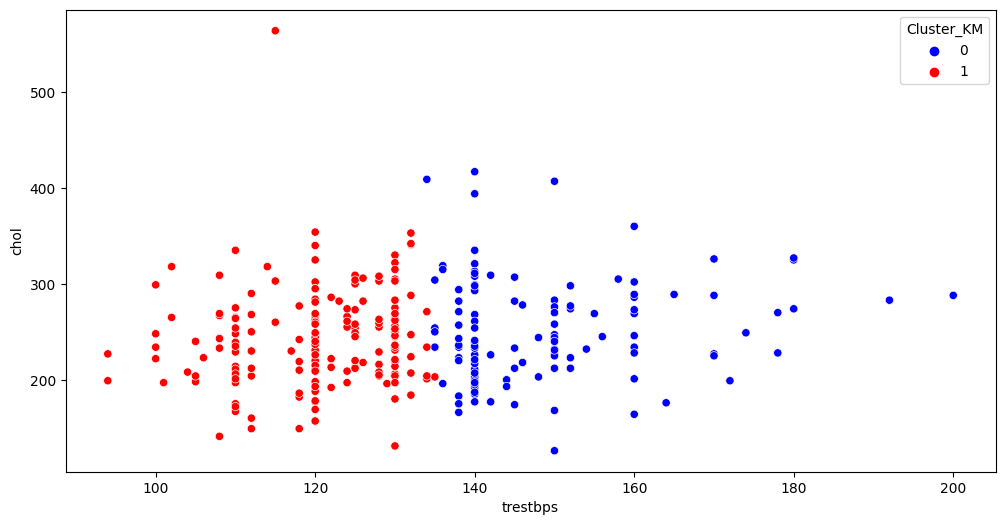

In [55]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold','green','cyan']
sns.scatterplot(x='trestbps', y='chol', hue='Cluster_KM', data=df, palette=palette)
plt.show()

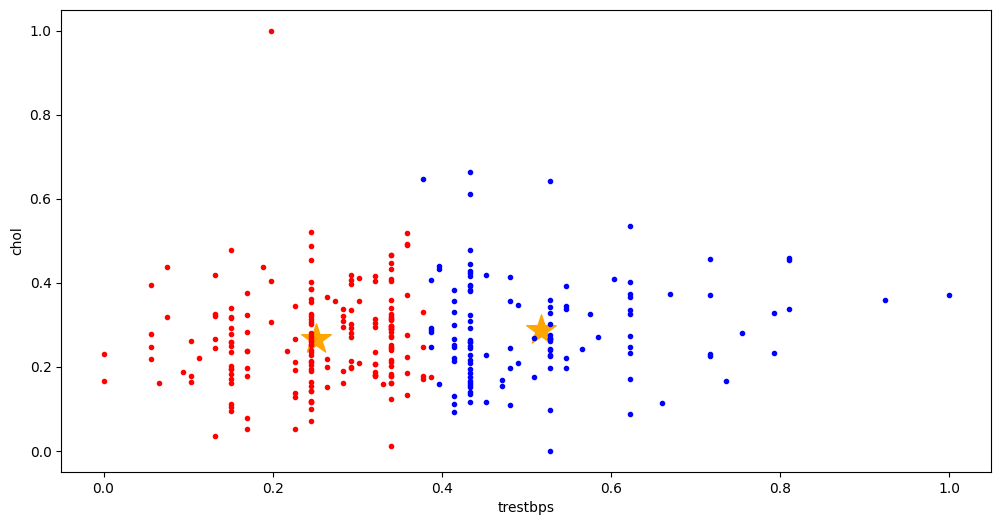

In [56]:
plt.figure(figsize=(12,6))
plt.scatter(
    kn5.cluster_centers_[:,0],
    kn5.cluster_centers_[:,1],
    color='orange', marker='*', s=500
)
plt.plot(df2['trestbps'][df2['Cluster_KM']==0].values, df2['chol'][df2['Cluster_KM']==0].values, 'b.')
plt.plot(df2['trestbps'][df2['Cluster_KM']==1].values, df2['chol'][df2['Cluster_KM']==1].values, 'r.')

plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

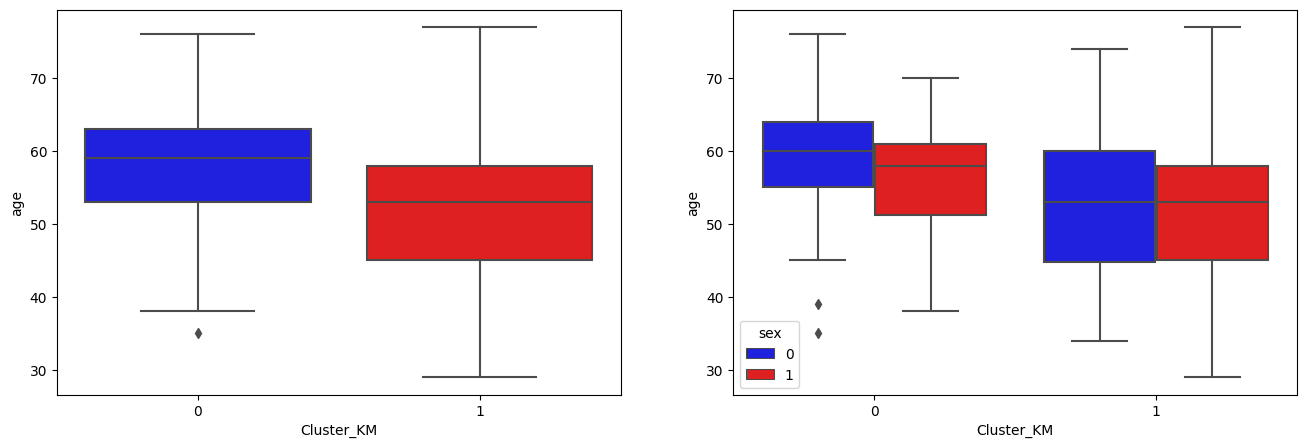

In [57]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_KM', y='age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_KM', y='age', hue='sex', data=df, palette=palette)

plt.show()

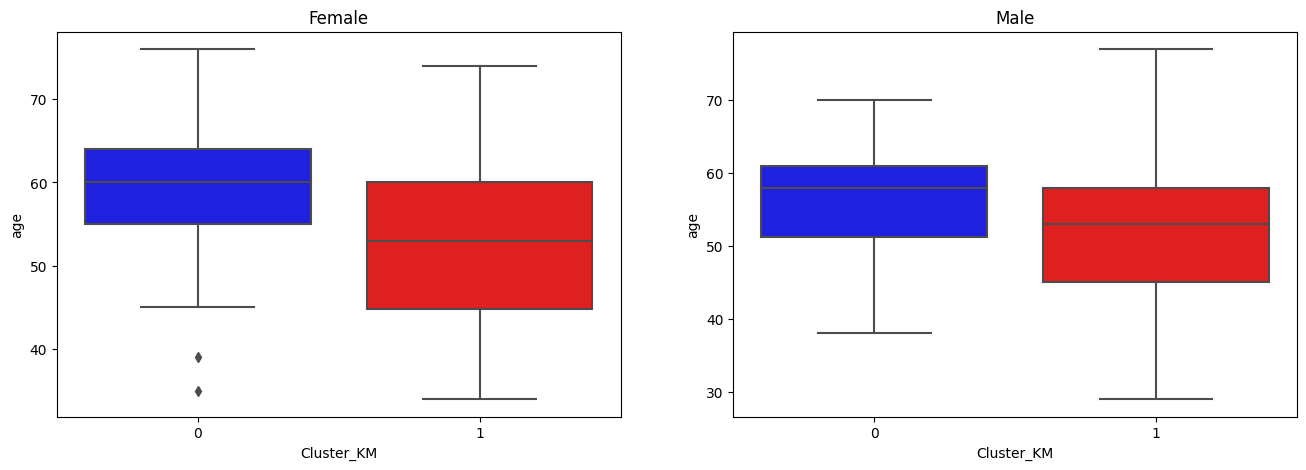

In [58]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_KM', y='age', data=df[df['sex']==0].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_KM', y='age', data=df[df['sex']==1].reset_index(drop=True), palette=palette)

plt.show()

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


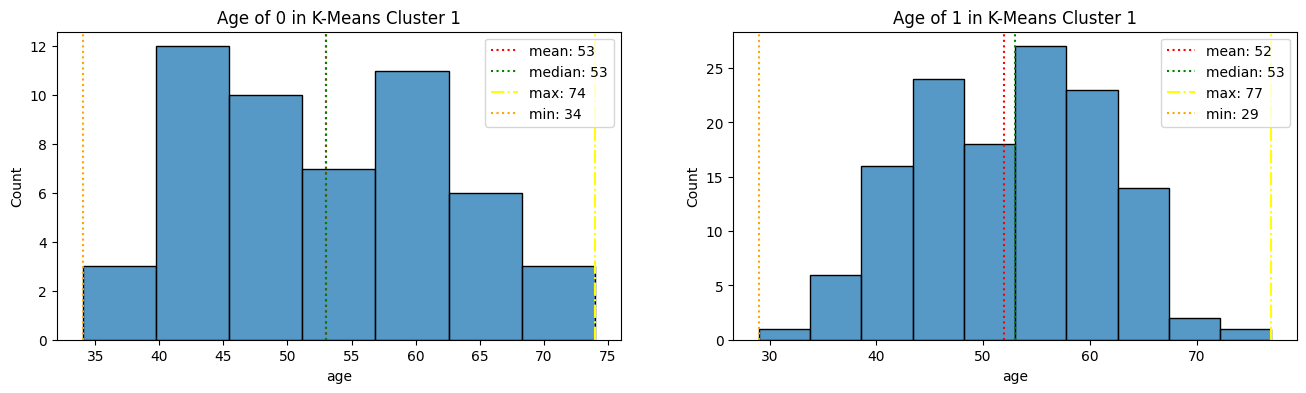

In [59]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = [0,1]
no_cluster = 1  # ada pilihan cluster (0,1,2,3,4)
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_KM']==no_cluster) & (df['sex']==col)]['age']
  plt.title(f'Age of {col} in K-Means Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1

# Hierarchical Clustering (Linkage)

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

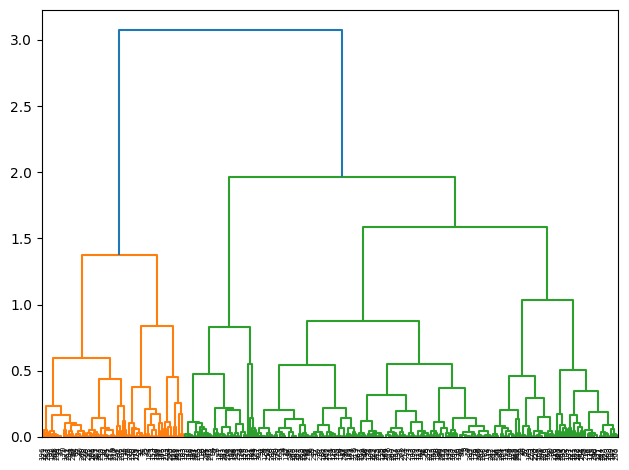

In [61]:
linkage_data = linkage(df2[['trestbps','chol']], method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df2[['trestbps','chol']])

pred_agc = pd.Series(hierarchical_cluster.labels_)
df2['Cluster_HA'] = pred_agc; df['Cluster_HA'] = pred_agc

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [63]:
display(df)
display(df2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0,1
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1,0
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1,0
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA
0,63,1,0,0.481132,0.244292,1,2,150,0,2.3,2,0,2,0,0,1
1,67,1,3,0.622642,0.365297,0,2,108,1,1.5,1,3,1,1,0,1
2,67,1,3,0.245283,0.235160,0,2,129,1,2.6,1,2,3,1,1,0
3,37,1,2,0.339623,0.283105,0,0,187,0,3.5,2,0,1,0,1,0
4,41,0,1,0.339623,0.178082,0,2,172,0,1.4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0.150943,0.315068,0,0,132,0,1.2,1,0,3,1,1,0
299,68,1,3,0.471698,0.152968,1,0,141,0,3.4,1,2,3,1,0,1
300,57,1,3,0.339623,0.011416,0,0,115,1,1.2,1,1,3,1,1,0
301,57,0,1,0.339623,0.251142,0,2,174,0,0.0,1,1,1,1,1,0


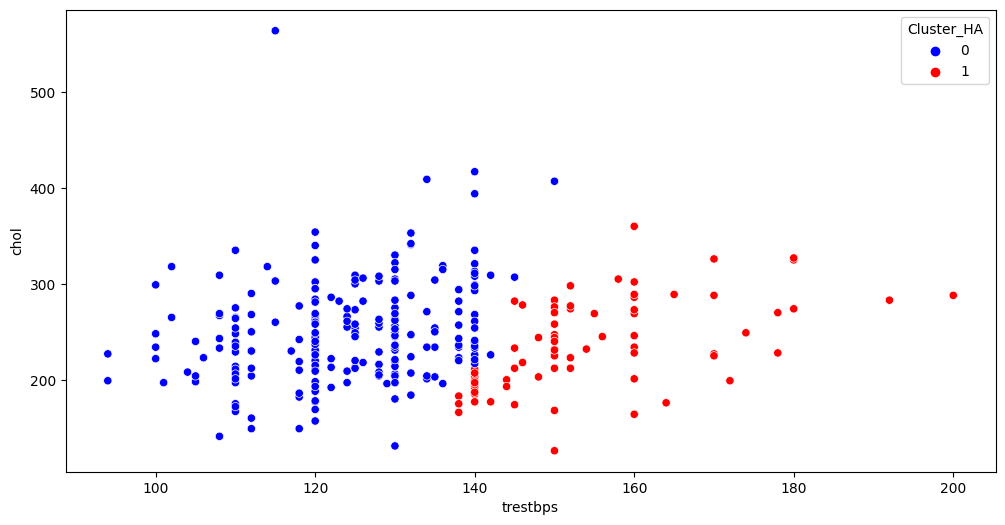

In [64]:
plt.figure(figsize=(12,6))
palette = ['blue','red']
sns.scatterplot(x='trestbps', y='chol', hue='Cluster_HA', data=df, palette=palette)
plt.show()

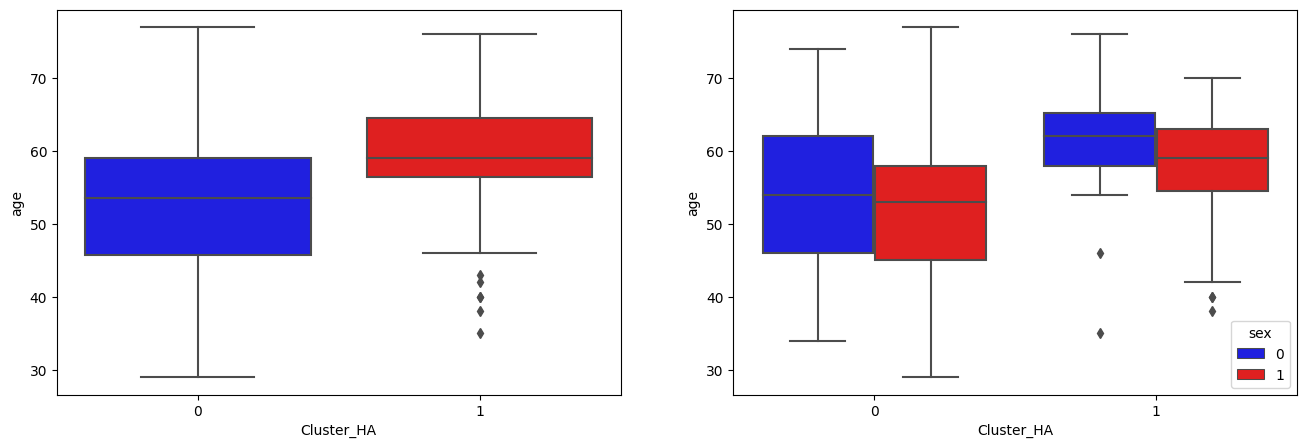

In [65]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_HA', y='age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_HA', y='age', hue='sex', data=df, palette=palette)

plt.show()

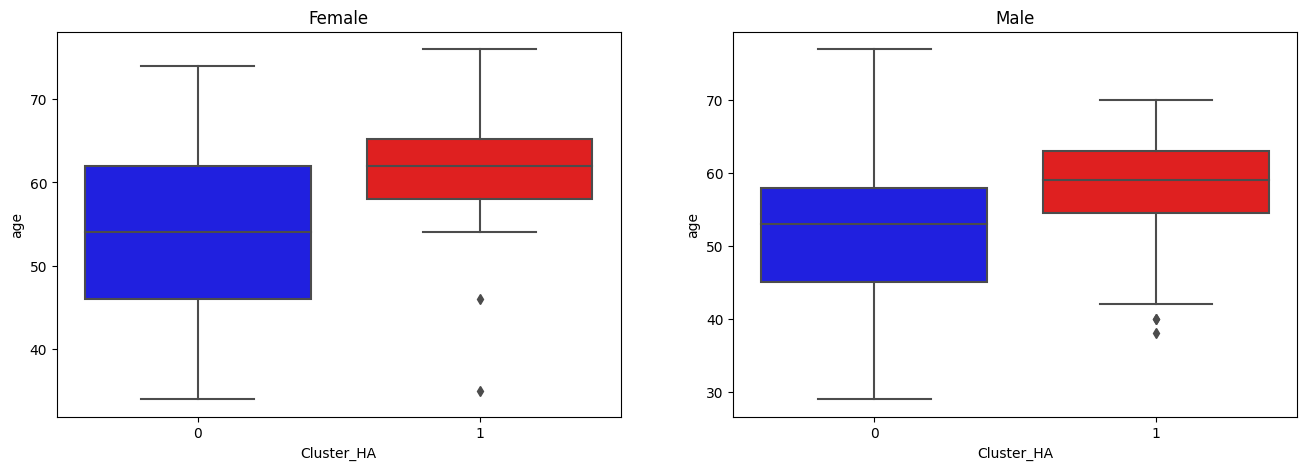

In [66]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_HA', y='age', data=df[df['sex']== 0].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_HA', y='age', data=df[df['sex']== 1].reset_index(drop=True), palette=palette)

plt.show()

C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\try1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


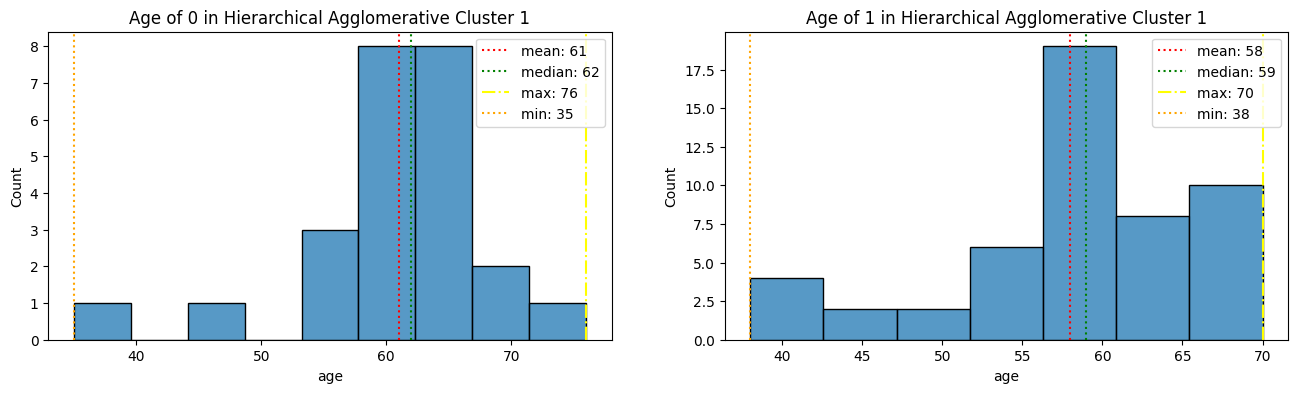

In [67]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = [0,1]
no_cluster = 1
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_HA']==no_cluster) & (df['sex']==col)]['age']
  plt.title(f'Age of {col} in Hierarchical Agglomerative Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1

# DBSCAN Clustering (Linkage)

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
db_model = DBSCAN(eps = 0.1, min_samples = 10).fit(df2[['trestbps','chol']])
db_model

DBSCAN(eps=0.1, min_samples=10)

In [70]:
labels = db_model.labels_
print('Cluster yang terbentuk: ', pd.unique(labels))
print(labels)

Cluster yang terbentuk:  [ 0 -1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0]


In [71]:
df['Cluster_DB'] = labels
df2['Cluster_DB'] = labels
display(df)
display(df2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0,1,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1,0,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1,0,0
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0,1,0
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1,0,-1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1,0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB
0,63,1,0,0.481132,0.244292,1,2,150,0,2.3,2,0,2,0,0,1,0
1,67,1,3,0.622642,0.365297,0,2,108,1,1.5,1,3,1,1,0,1,0
2,67,1,3,0.245283,0.235160,0,2,129,1,2.6,1,2,3,1,1,0,0
3,37,1,2,0.339623,0.283105,0,0,187,0,3.5,2,0,1,0,1,0,0
4,41,0,1,0.339623,0.178082,0,2,172,0,1.4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0.150943,0.315068,0,0,132,0,1.2,1,0,3,1,1,0,0
299,68,1,3,0.471698,0.152968,1,0,141,0,3.4,1,2,3,1,0,1,0
300,57,1,3,0.339623,0.011416,0,0,115,1,1.2,1,1,3,1,1,0,-1
301,57,0,1,0.339623,0.251142,0,2,174,0,0.0,1,1,1,1,1,0,0


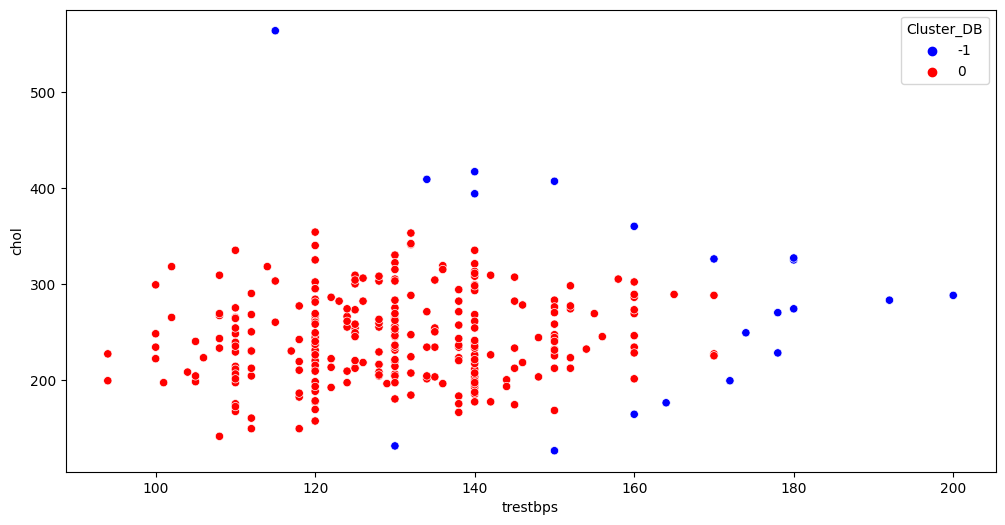

In [72]:
plt.figure(figsize=(12,6))
palette = ['blue','red']
sns.scatterplot(x='trestbps', y='chol', hue='Cluster_DB', data=df, palette=palette)
plt.show()

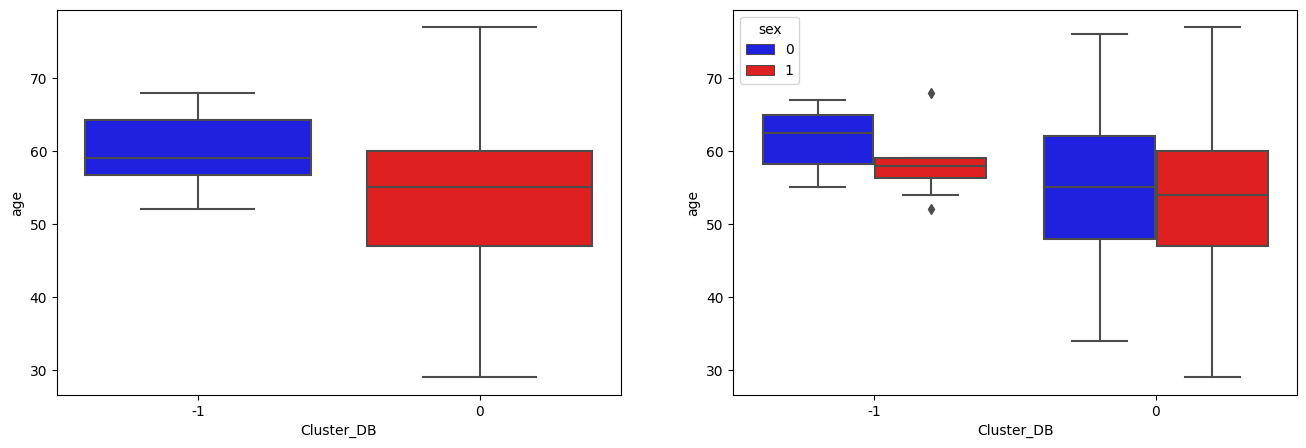

In [73]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_DB', y='age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_DB', y='age', hue='sex', data=df, palette=palette)

plt.show()

In [79]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0,1,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1,0,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1,0,0
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0,1,0
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1,0,-1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1,0,0


# Grid-Based Clustering (Linkage)

In [82]:
!pip install pyclustering

In [83]:
from pyclustering.cluster.clique import clique # Select clustering method: clique class
from pyclustering.cluster.clique import clique_visualizer # clique visualization

In [84]:
# Create CLIQUE algorithm for processing
intervals = 5  # Define the number of grid cells in each dimension
threshold = 10 # Density threshold
clique_instance = clique(df2[['trestbps','chol']].values, intervals, threshold)

In [85]:
# Start the clustering process and get the results
clique_instance.process()
clique_cluster = clique_instance.get_clusters()  # allocated clusters

In [86]:
# Points considered as outliers (noise points)
noise = clique_instance.get_noise()
# CLIQUE formed grid unit
cells = clique_instance.get_cells()

In [87]:
print("Amount of clusters:", len(clique_cluster))
print(clique_cluster)

Amount of clusters: 1
[[20, 29, 46, 50, 57, 74, 80, 93, 160, 169, 204, 216, 222, 226, 228, 229, 250, 273, 4, 24, 36, 49, 51, 59, 64, 98, 101, 104, 112, 115, 129, 132, 134, 138, 142, 165, 177, 190, 194, 215, 225, 230, 232, 244, 248, 249, 255, 266, 269, 274, 279, 282, 283, 292, 294, 295, 300, 16, 45, 52, 73, 96, 100, 103, 122, 127, 131, 144, 145, 147, 151, 162, 163, 176, 195, 200, 214, 220, 221, 224, 240, 246, 247, 256, 298, 9, 10, 15, 41, 43, 61, 66, 106, 116, 117, 136, 174, 185, 202, 207, 257, 264, 270, 284, 290, 293, 299, 302, 2, 3, 5, 8, 12, 13, 18, 19, 22, 23, 25, 31, 33, 34, 53, 54, 55, 58, 62, 71, 72, 76, 78, 81, 87, 89, 92, 94, 95, 99, 107, 108, 109, 111, 114, 119, 120, 125, 128, 130, 135, 137, 139, 154, 157, 159, 164, 167, 168, 179, 180, 186, 192, 198, 206, 208, 210, 211, 212, 223, 233, 235, 236, 237, 238, 239, 242, 243, 245, 252, 253, 259, 260, 263, 267, 281, 287, 288, 289, 301, 0, 6, 11, 17, 21, 27, 28, 30, 35, 37, 39, 40, 47, 56, 65, 67, 69, 70, 79, 85, 86, 88, 97, 123, 124, 

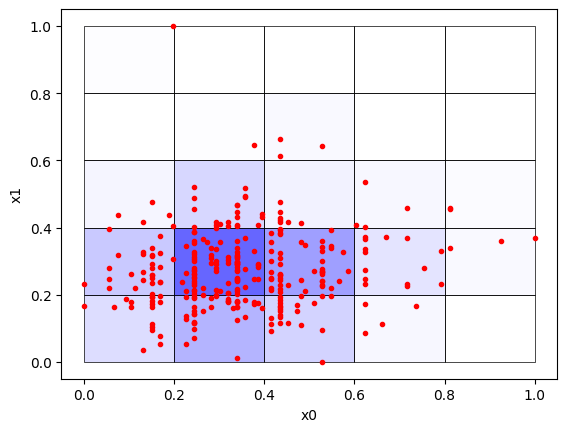

In [88]:
# Display the grid formed by the algorithm
clique_visualizer.show_grid(cells, df2[['trestbps','chol']].values)

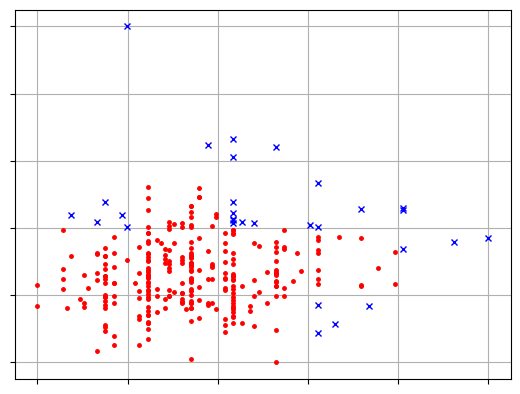

In [89]:
# Display clustering results
clique_visualizer.show_clusters(df2[['trestbps','chol']].values, clique_cluster, noise)  # show clustering results

In [92]:
print(len(clique_cluster))
print(len(noise))

1
30


In [93]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0,1,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1,0,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1,0,0
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0,1,0
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1,0,-1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1,0,0


In [94]:
df['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)
df2['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)

# Memetakan setiap sampel ke cluster yang sesuai
for cluster_id, cluster in enumerate(clique_cluster):
    for sample_id in cluster:
        df.loc[sample_id, "Cluster_CL"] = cluster_id
        df2.loc[sample_id, "Cluster_CL"] = cluster_id

# Menangani noise points
for noise_id in noise:
    df.loc[noise_id, "Cluster_CL"] = -1
    df2.loc[noise_id, "Cluster_CL"] = -1

In [95]:
display(df)
display(df2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB,Cluster_CL
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,0,1,0,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,0,1,0,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,1,0,0,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,1,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1,1,0,0,0
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,0,1,0,0
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1,1,0,-1,0
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1,1,0,0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster_KM,Cluster_HA,Cluster_DB,Cluster_CL
0,63,1,0,0.481132,0.244292,1,2,150,0,2.3,2,0,2,0,0,1,0,0
1,67,1,3,0.622642,0.365297,0,2,108,1,1.5,1,3,1,1,0,1,0,0
2,67,1,3,0.245283,0.235160,0,2,129,1,2.6,1,2,3,1,1,0,0,0
3,37,1,2,0.339623,0.283105,0,0,187,0,3.5,2,0,1,0,1,0,0,0
4,41,0,1,0.339623,0.178082,0,2,172,0,1.4,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0.150943,0.315068,0,0,132,0,1.2,1,0,3,1,1,0,0,0
299,68,1,3,0.471698,0.152968,1,0,141,0,3.4,1,2,3,1,0,1,0,0
300,57,1,3,0.339623,0.011416,0,0,115,1,1.2,1,1,3,1,1,0,-1,0
301,57,0,1,0.339623,0.251142,0,2,174,0,0.0,1,1,1,1,1,0,0,0


In [96]:
display(df['Cluster_CL'].value_counts())
display(df2['Cluster_CL'].value_counts())

Cluster_CL
 0    273
-1     30
Name: count, dtype: int64

Cluster_CL
 0    273
-1     30
Name: count, dtype: int64

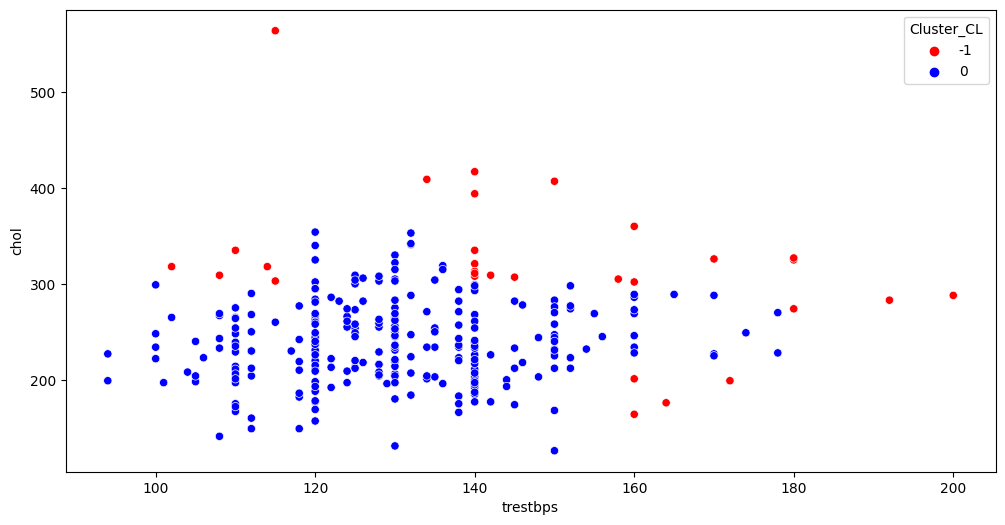

In [97]:
plt.figure(figsize=(12,6))
palette = ['red','blue']
sns.scatterplot(x='trestbps', y='chol', hue='Cluster_CL', data=df, palette=palette)
plt.show()

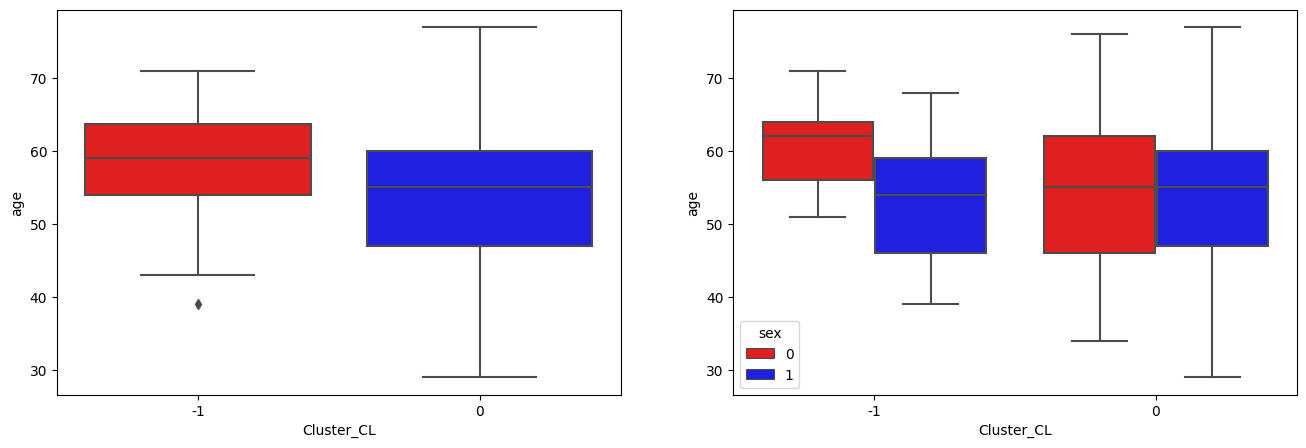

In [98]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_CL', y='age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_CL', y='age', hue='sex', data=df, palette=palette)

plt.show()

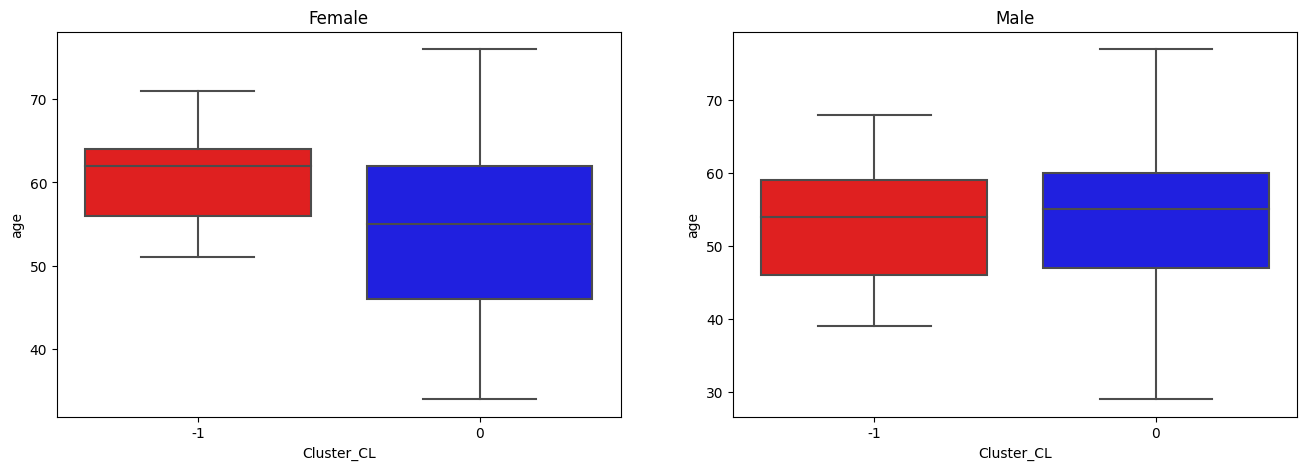

In [99]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_CL', y='age', data=df[df['sex']== 0].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_CL', y='age', data=df[df['sex']== 1].reset_index(drop=True), palette=palette)

plt.show()